In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *

# rock-paper-scissors classifier

Teaching computers to play rock-paper-scissors (and win) is the first step towards building Artificial General Intelligence. And the first step towards that is training a model to recognize rock, paper and scissors!

Take a photo of your hand and let the model guess whether it's rock, paper or scissors!

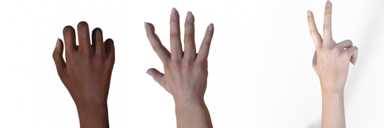

In [21]:
r_img = Image.open('r.png')
p_img = Image.open('p.png')
s_img = Image.open('s.png')

grid = Image.new('RGBA', size=(128*3, 128))
grid.paste(r_img.to_thumb(128, 128), box=(0, 0))
grid.paste(p_img.to_thumb(128, 128), box=(128, 0))
grid.paste(s_img.to_thumb(128, 128), box=(128*2, 0))
grid

In [2]:
path = Path()
learn_inf = load_learner(path/'export.pkl', cpu=True)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [3]:
def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [4]:
btn_upload.observe(on_data_change, names=['data'])

In [7]:
display(VBox([widgets.Label('Rock Paper Scissors!'), btn_upload, out_pl, lbl_pred]))